# <center> CS207 Final Project: Milestone 2 - November 19 2019 </center>

---


<center> Geng Yichen, Jian Yingsi, Meeus Matthieu, Zhang Lihong </center>

# 1 Introduction







Derivatives come up in every aspect of science and engineering. Calculus taught us how to derive analytical expressions of functional derivatives, but in many cases this is either impossible or too much of a hassle. Therefore, numerical methods or algorithmic approaches to compute the derivative are extremely important. 
Methods of computing functions' derivatives in computer programs can be classified into 4 types: 

(1) Determining derivatives by hands and coding them. <br/>
(2) Symbolic differentiation in computer tools, such as Mathematica and Maple. <br/>
(3) Numerical methods: using finite differences to approxiate derivatives. <br/>
(4) Automatic Differentiation, which is the subject of our project. <br/>

Automatic differentiation (AD) is a set of techniques for evaluating functional derivatives efficiently and accurately in computer programs. For any analytic function f(x) to be differentiated at a point $x_0$, AD first rewrites f(x) as a combination of elementary functions, then determining the derivative values of f(x) through combining derivatives of elementary functions by the chain rule. Since the derivative values of all elementary functions are known and accurate, and the procedures of AD have no potential sources of errors except tiny rounding errors due to machine precision, thus the derivative values obtained by AD are accurate. As for other differentiation methods, manual calculating functional derivatives and coding them by hands can be tedious, time-consuming and prone to make mistakes; symbolic differentiation could return rigmarole and unreadable symbolic expressions; and numerical method of finite differences could be ill-conditioned due to truncation and round-off errors, and is also inappropriate to handle functional derivatives with many independent variables. 

For example, in the numerical method of finite difference, the derivative is calculated as the following where the limit for h is approached but not put to zero:

$$\frac{df}{dx} \approx \frac{f(x+h) - f(x)}{h}$$

While this approach yields decent results in many cases, it is never completely accurate. For too large values of h, the error originates from the intrinsic error of the finite difference derivative. For too small values of h, the error originates from rounding errors. 

Although AD does not show explicit derivative expressions, people usually only want to obtain derivative values at some points rather than symbolic expressions, thus AD is much better than other differentiation methods with respect to determining functional derivative values.

In modern differentiation computation, AD is the most efficient and accurate tool to implement differentiation in computer programs. In this project, we will design an accurate, user-oriented differentiation calculator by implementing AD.


# 2 Background




Automatic differentiation is an algorithmic approach to compute derivatives up until machine precision accuracy. It has two common methods: forward and reverse mode. In this project, only the forward mode will be discussed at first. Forward automatic differentiation leverages the chain rule to split the differentiation of a complex function in elementary functions and makes use of the easy derivatives of elementary functions.  If $h(u(t))$ is the function of which the derivative is required, the chain rule for partial derivatives says:

$$\frac{\partial h}{\partial t} = \frac{\partial h}{\partial u}*\frac{\partial u}{\partial t}$$

Or for $h(u(t), v(t))$:

\begin{equation}
    \frac{\partial h}{\partial t} = \frac{\partial h}{\partial u}*\frac{\partial u}{\partial t} + \frac{\partial h}{\partial v}*\frac{\partial v}{\partial t}
\end{equation}

Hence, the computation of the derivatives of complicated functions that consist of multiple, consequent elementary operations can be split into the multiplication and addition of derivatives of the elementary functions in the following table. Examples of the elementary operations are addition and multiplication but also sine, cosine and log. The complete list of elementary functions that will be incorporated in this package can be found in 'Implementation'. A subset is illustrated in the table below:

| Elementary function        | Example | 
| :-------------: |:-------------:|
| Field Operations    | $+ - * / $ |
| Powers     |$x^2, x^6$|
| Roots     |$\sqrt{x}$|
| Trigonometric     |$sin(x)$|
| Inverse Trigonometric     |$asin(x)$|
| Logarithmic     |$log(x)$|
| Exponential    |$e^x$|

The split of the complex function into its elementary operations is commonly visualized in a so-called computational graph. This summarizes the sequence of operations that need to be done for the evaluation and differentiation of the function. An example for the simple function $f(x,y) = xy + exp(xy) $ is given in the image below. Note that this example comes from Lecture 12.


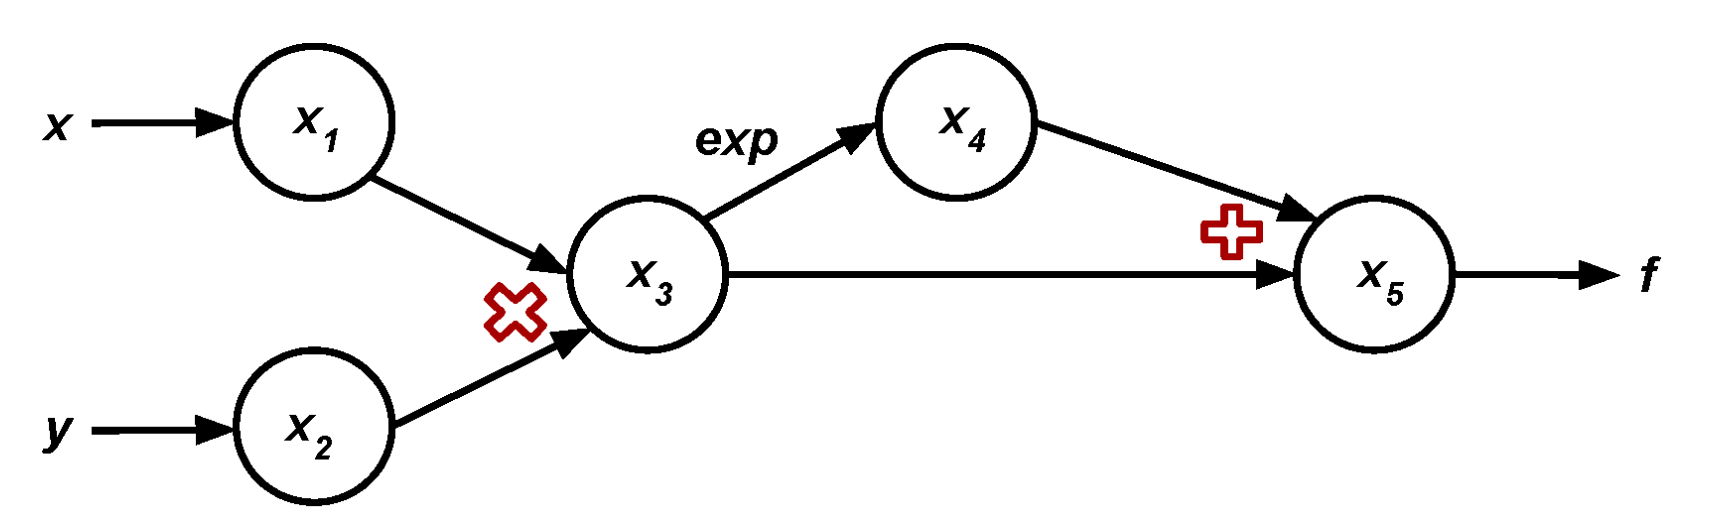


The actual implementation of the forward mode can be better understood using the so-called seed vectors $p_i$ for every variable $x_i$. This means that, every time the derivative of a function is computed, the derivative is 'seeded', or multiplied (dot product) by the corresponding seed. An example might clarify this. Imagine function $f = x*cos(y)$, where x and y are the variables corresponding to seed vectors $p_1 = [1,0]$ and $p_2 = [0,1]$ respectively. The directional derivative $D_p$ of f will then be computed as follows:

$$D_px_3 = \sum_{i}^n \frac{\partial x_3}{x_i} p_i$$

Where $x_1$, $x_2$ and $x_3$ correspond to x, y and $x*cos(y)$. We can then specify the direction p to find the desired derivative. For instance, for $p = [1,0]$, we recover:

$$D_px_3 = \frac{\partial x_3}{\partial x_1} p_1 + \frac{\partial x_3}{\partial x_2}p_2 = \frac{\partial x_3}{\partial x_1} = \frac{\partial f}{\partial x}$$

Or mathematically:

$$D_px_3 = \nabla x_3 \cdot p$$

This means that the forward mode of automatic differentiation is actually computing the dot product of the gradient and the seed vector. Choosing the seed vectors appropriately, either this product or the full gradient can be recovered, dependent on the application.

For functions in higher dimensions h(x): ${\rm I\!R}^m \rightarrow {\rm I\!R}^n$, the entire Jacobian will be computed using the same, simple approach. Recall the definition of the Jacobian J in ${\rm I\!R}^{nxm}$ for function h(x):

$$\mathbf{J}=\left[\begin{array}{cccc}
\frac{\partial h_1}{\partial x_1} & \frac{\partial h_1}{\partial x_2} & .. & \frac{\partial h_1}{\partial x_m} \\
\frac{\partial h_2}{\partial x_1} & \frac{\partial h_2}{\partial x_2} & .. & \frac{\partial h_2}{\partial x_m} \\
.. & .. & .. & .. \\
\frac{\partial h_n}{\partial x_1} & \frac{\partial h_n}{\partial x_2} & .. & \frac{\partial h_n}{\partial x_m}
\end{array}\right]$$

Note that the seed vector approach is still valid for this high-dimensional case. So teh forward mode is actually computing the product of the Jacobian with the seed vector. Again, the entire Jacobian can be recoverd by choosing the seed vectors appropriately and adding the resulting products.

# 3 How to Use AutoDiff

## 3.1 How to install AutoDiff
There are two methods of installing our package: Github and PyPI. The installation details are listed below. After installation, the user should import the class Var, which represents variables, from our package (shown as the pseudocode below) and other dependencies (such as numpy and math) since we import those dependencies to our package modules. With the imported package, the user can define x as an object of Var, and give the initial input of x. Then the user can apply function f on x, which returns f(x) with new values and jacobian. 
### 3.1.1 Installation from Github


*   Step 1: Download our package from Github to users' local directory by the following commands in the terminal
```
mkdir AutoDiff
cd AutoDiff
git clone https://github.com/BackPropagators/cs207-FinalProject.git
cd cs207-FinalProject
```

*   Step 2: Create and Activate a virtual environment in conda.
 * If the user don't have conda, she/he should install it. Then the user can create his/her own virtual environment in conda by the following codes, where yourname is the name the user wants to call the newly created environment.
```
conda create -n yourname python=3.6 anaconda
```
 * Activate the user's virtual environment
 ```
 source activate yourname
 ```
 * Install the required dependencies and run the given tests in AutoDiff
 ```
 pip install -r requirements.txt
 pytest
 ```
 If pytest is not installed, then the user can install it by
 ```
 pytest install -U pytest
 ```

 * Use AutoDiff Python package in the terminal (See demo in 3.2)
 ```python
>>> from AutoDiff.ForwardAD import Var
>>> x = Var(1)
>>> f = x + 1
>>> f.get_value()
2
>>> f.get_jacobian()
[1]
...
>>> quit()
```
```
# deactivate virtual environment
conda deactivate
```


### 3.1.2 Installation from PyPI.
We will use PyPI to distribute our package in our futre development of the package.


## 3.2 Basic Demo 
Install our package, and import the module and dependencies 
```python
pip install AutoDiff
python
>>> from AutoDiff.ForwardAd import Var
>>> import numpy as np
```
instantiate a `Var` class.
```
>>> x = Var(1.0)
```
Define a function.
```python
>>> f = x + 1
```
Evaluate the function value which is expected to be 2.0.
```python
>>> f.get_value()
2.0
```
Evaluate the function jacobian which is exepcted to be [1.0].
```python
>>> f.get_jacobian()
[1.0]
```

Evaluate the value and jacobian of scaler function with one variable.
```python
# basic operation
# Expect the value of f is 3.0, and the derivative of f is [2.0]
>>> x = Var(1)
>>> f = 2*x + 1
>>> f.get_value()
3.0
>>> f.jacobian
[2.0]

# exponential function
# Expect the value of f is around 2.718281828459, and the derivative is around [2.718281828459]
>>> f = Var.exp(x)
>>> f.get_value()
2.718281828459045
>>> f.get_jacobian()
[2.718281828459045]

# logarithmic function
# Expect the value of f is 0.0, and the derivative of f is around [0.43429448190325]
>>> f = Var.log(x, b=10)
>>> f.get_value()
0.0
>>> f.get_jacobian()
[0.43429448190325176]

# trignometric function
# Expect the value of f is 0.49999999999999994, and the derivative is [0.8660254037844]
>>> y = Var(np.pi/6)
>>> f = Var.sin(y)
>>> f.get_value()
0.49999999999999994
>>> f.get_jacobian()
[0.8660254037844387]
```

# 4 Software Organization


**4.1 Project Directory Structure**



  
                    CS207-FinalProject/
                                       README.md
                                       LICENSE
                                       setup.py
                                       AutoDiff/
                                                _init_.py
                                                ForwardAD.py
                                       docs/
                                                     milestone1.ipynb
                                                     milestone2.ipynb
                                       test/
                                            test_all.py
                                       demo/
                                            presentation.pdf
                                       ...
                   
                           
**4.2 Included Modules and Basic Functionality**

AutoDiff: This module includes implementation for classes AutoDiff and Multifunc. AutoDiff and Multifunc implement the forward mode of auto differentiation. AutoDiff takes care of scalar function inputs (with single and multiple variables) and Multifunction takes care of vector function inputs. 

Test: This module includes all the test suites for the package.


**4.3 Test**

The test suites live in *CS207-FinalProject/Test/* folder.  We will use Travis CI to run tests and use CodeCov to automatically checks code coverage. 


**4.4 Distributing Our Package**

We will use PyPI to distribute our package. The Python Package Index (PyPI) is a repository of software for the Python programming language.


**4.5 Packaging**

We will follow the Python Packaging User Guide published by the Python Packaging Authority(PyPA), which is the authoritative resource on how to package, publish, and install Python projects using current tools. We will use Setuptools because it is comprehensive, actively-maintained, and stable to  create an package for easy distibution out of our project.












# 5 Implementation

**5.1 Core Data Structures**\
The core data structure for storing the jacobian is python dictionary, where the key is the variable (an instance of `Var`, see **Core Classes** below) and the value is its partial derivative.

**5.2 Core Classes**\
In the `ForwardAD.py`, we implemented the `Var` class, which defines the variables in a function and calculates the jacobian of scalar function with single and multiple variables (multivariables will be tested in the future; see 5.6 for details). We have also implemented the `MultiFunc` class, which calculates the jacobian of vector functions with single and multiple variables (`MultiFunc` will be tested in the future, so it is not included in the code; see 5.6 for details). 

**5.3 Important Attributes**\
The `Var` class has two private attributes: `self._val` and `self._jacobian`. `self._val` stores the value of the current function, and `self._jacobian` is a dictionary whose key is a `Var` instance and value is its partial derivative. `self._jacobian` is initialized as {self: 1} in the constructor. When there is only one variable in the function, after each operation, only the value (jacobian) may be updated whereas the key (variable) remains the same in the new dictionary. When there are multiple variables in the function, after each operation, values (jacobian) may be updated and new key (variable) may be added in the new dictionary.

**5.4 External Dependencies**\
We will rely on the `math` and `NumPy` package.

**5.5 Elementary Functions**\
We defined methods that deal with these elementary functions inside the `Var` class. To use these functions, simply call `Var.function_name`. See demo in 3.2.

**5.6 Multivariable Function and Vector Functions**\
To get the jacobian of a multivariable function, we ask to user to supply the order of `Var` in a list. The following code demoes the process.
```python
from AutoDiff.ForwardAD import Var
>>> x = Var(1)
>>> y = Var(2)
>>> f = x + 2*y
>>> f.get_jacobian_([x, y])
[1.0, 2.0]
```

For vector functions, we ask to user to supply the functions in a list. The following code demoes the process.
```python
from AutoDiff.ForwardAD import MultiFunc
>>> x = Var(1)
>>> F = MultiFunc([x+1, 2*x])
>>> F.get_jacobian()
[[1], [2]]
```






# 6 Future Features

For the moment, only single functions of single variables have been included and tested in the submitted code. However, this has been thought through as discussed in the implementation and will be included for the final deliverables. 

With the forward mode of automatic differentiation up and running, additional features that rely on differentiation up until machine precision can be developed. This section will discuss the mathematical background of root-finding and optimization, which will be implemented as additional features of the packages for the final version.

**6.1 Root-finding**

First, root-finding arises in many applications in any kind of engineering and science. Consider the general problem in which the purpose is to find that x-value that satisfies the following equation for a certain function f:

$$f(x) = 0$$

There are multiple numerical approaches to iteratively find this x-value, including the famous Newton's method. Here, a certain starting value $x^{(0)}$ is chosen, after which the following equation is used to update $x^{(k)}$ until a particular convergence criterium is reached:

$$x^{(k)} = x^{(k)}-{\frac {f(x^{(k)})}{f'(x^{(k)})}}\$$

Note that the derivative of f with respect to x evaluated at $x^{(k)}$ plays a crucial role in this equation. In many cases, analytical expressions for $f'(x)$ are not available and numerical differentiation methods are needed. With the forward mode of the automatic differentiation working, the Newton's method for root-finding can be implemented. It is foreseen that the the user interacts as follows with this module of the package AutoDiff:

```python
>>> from AutoDiff.ForwardAd import Var
>>> from AutoDiff import Newton
>>> def f(x):
    return Var.sin(x)**(Var.sqrt(x))
>>> x_0 = 0.1
>>> root = Newton(f, x_0)
```

In multiple dimensions the iterative expression becomes:

$$\mathbf {x} ^{(k+1)}=\mathbf {x} ^{(k)}-[\mathbf {H} f(\mathbf {x} ^{(k)})]^{-1}\nabla f(\mathbf {x} ^{(k)}) $$

Here, $\mathbf {x}$ represents a vector and $\mathbf {H}$ and $\nabla f$ the Hessian and gradient of f with respect to $\mathbf {x}$ respectively.


**6.2 Optimization**

A second, highly relevant application of numerical differentiation can be in optimization. In many problems, and most notably in Computer Science and Machine Learning in the last years, is it crucial to efficiently minimize a certain function F in terms of multiple variables $\mathbf {x} = (x_1, ..., x_n)$. Or mathematically:

$$\mathbf {x}_{solution} = \underset{\mathbf {x}}{argmin}   F(\mathbf {x})$$

A common numerical method that iteratively computes the solution for this equation is gradient descent. In this algorithm, an initial guess is iteratively updated by the taking a step in the direction that is alligned with the steepest descent - or in the opposite direction of the gradient at that particular value. This leads to the following equation:

$${\displaystyle \mathbf {x} ^{(k+1)}=\mathbf {x} ^{(k)}-\gamma \nabla F(\mathbf {x} ^{(k)})}$$

Here, $\gamma$ is called the 'learning rate' and corresponds to the size of the step taken in the steepest direction. Again, it is crucial to accurately compute the gradient $\nabla F(\mathbf {x} ^{(k)})$ in every iteration and this is where the automatic differentiation package comes in. For the moment, it is foreseen that the user would interact with the package as follows:

```python
>>> from AutoDiff.ForwardAd import Var
>>> from AutoDiff import GradientDescent as GS
>>> def F(x1, x2, x3):
    return Var.sin(x1)**(Var.sqrt(x2)) + x3
>>> x_0 = [0.1, 0, 2]
>>> gamma = 0.1
>>> argmin, min_F = GS(F, x_0, gamma)
```

Note that argmin stands for the array of values for $\mathbf {x}$ that minimizes F and min_F corresponds of the actual value of the function F at that minimum. Also, it is important to know that teh gradient descent algorithm does not guarantee an absolute minimum, but through clever implementations it is able to find a local minimum that satisfies the criteria in practice. 